<h1><center>Machine Learning on Titanic dataset</center></h1>

## Import Data

In [67]:
# import common libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

In [68]:
# import dataset
tit_train = pd.read_csv('train.csv')

### Train Data Exploration: 
- Data available: 891 passengers
- features available: 10
- missing data in feature: **age** , **cabin**, **embarked**
- Age: min=0.42, max=80 yrs

### Data Legend
- **survival**	Survival	    0 = No, 1 = Yes
- **pclass**	    Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- **sex**	        Sex	
- **Age**	        Age in years	
- **sibsp**	    # of siblings / spouses aboard the Titanic	
- **parch**	    # of parents / children aboard the Titanic	
- **ticket**	    Ticket number	
- **fare**	    Passenger fare	
- **cabin**	    Cabin number	
- **embarked**	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [69]:
titanic_df = tit_train
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [71]:
titanic_df.Age.min()

0.42

In [72]:
# titanic_df.Age.sort_values(ascending=False)

In [73]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [74]:
titanic_df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,NaN,C
486,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.0000,C93,S
389,390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.0000,NaN,C


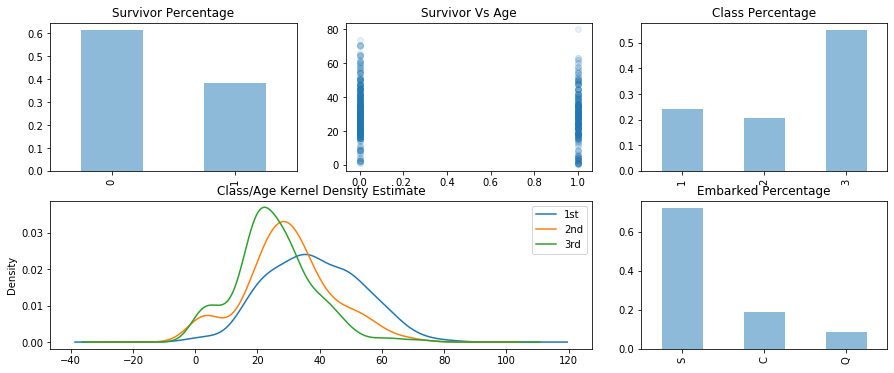

In [75]:
fig = plt.figure(figsize=(15,6))
# Survivor Percentage
plt.subplot2grid((2,3),(0,0))
titanic_df.Survived.value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Survivor Percentage")

# survivor vs age
plt.subplot2grid((2,3), (0,1))
plt.scatter(x=titanic_df.Survived, y=titanic_df.Age, alpha=0.1)
plt.title("Survivor Vs Age")

# Class Perncentage
plt.subplot2grid((2,3),(0,2))
titanic_df.Pclass.value_counts(normalize=True).sort_index().plot(kind="bar", alpha=0.5)
plt.title("Class Percentage")

# Class KDE (Kernel Desnisty Estimate)
plt.subplot2grid((2,3),(1,0),colspan=2)
for x in [1,2,3]:
    titanic_df.Age[titanic_df.Pclass==x].plot(kind="kde")
plt.title("Class/Age Kernel Density Estimate")
plt.legend(("1st","2nd","3rd"))

# Embarked Percentage
plt.subplot2grid((2,3),(1,2))
titanic_df.Embarked.value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Embarked Percentage")
plt.show()

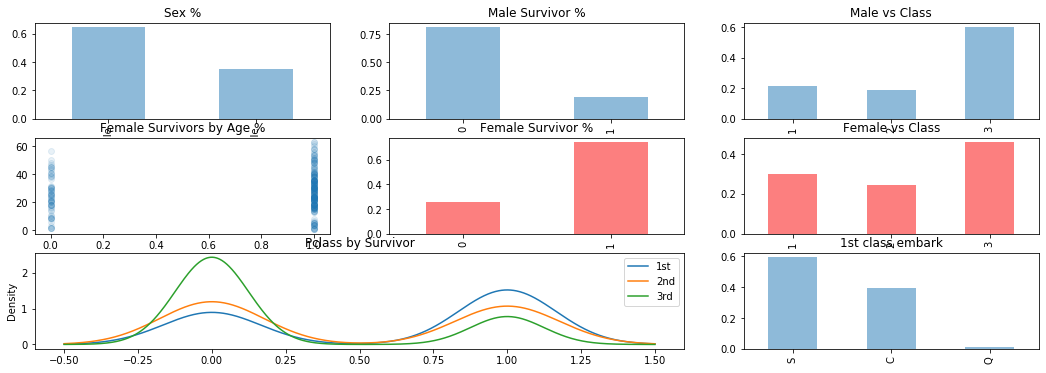

In [76]:
fig = plt.figure(figsize=(18,6))

# Male vs Female Percentage
plt.subplot2grid((3,3),(0,0))
titanic_df.Sex.value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title('Sex %')

# Male survivors
plt.subplot2grid((3,3),(0,1))
titanic_df.Survived[titanic_df.Sex=="male"].value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title('Male Survivor %')

# Male Class
plt.subplot2grid((3,3),(0,2))
titanic_df.Pclass[titanic_df.Sex=='male'].value_counts(normalize=True).sort_index().plot(kind="bar",alpha=0.5)
plt.title("Male vs Class")

female_col="#FA0000"

# Female vs Age
plt.subplot2grid((3,3),(1,0))
plt.scatter(x=titanic_df.Survived[titanic_df.Sex=="female"], y=titanic_df.Age[titanic_df.Sex=="female"],alpha=0.1)
plt.title('Female Survivors by Age %')

# Female survivors
plt.subplot2grid((3,3),(1,1))
titanic_df.Survived[titanic_df.Sex=="female"].value_counts(normalize=True).sort_index().plot(kind="bar",alpha=0.5, color=female_col)
plt.title('Female Survivor %')

# Female Class
plt.subplot2grid((3,3),(1,2))
titanic_df.Pclass[titanic_df.Sex=='female'].value_counts(normalize=True).sort_index().plot(kind="bar",alpha=0.5, color=female_col)
plt.title("Female vs Class")

# Survivors by class KDE
plt.subplot2grid((3,3),(2,0),colspan=2)
for i in [1,2,3]:
    titanic_df.Survived[titanic_df.Pclass== i].plot(kind="kde")
plt.title("Pclass by Survivor")
plt.legend(("1st","2nd","3rd"))

# Rich men embark
plt.subplot2grid((3,3),(2,2))
titanic_df.Embarked[titanic_df.Pclass==1].value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("1st class embark")
plt.show()

In [77]:
titanic_df.Survived[(titanic_df.Pclass==1) & (titanic_df.Sex=="male")].value_counts(normalize=True)

0    0.631148
1    0.368852
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Rich Women Survivors')

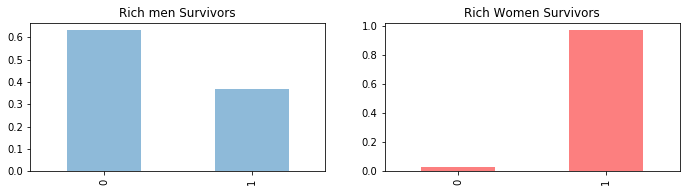

In [78]:
fig = plt.figure(figsize=(18,6))

#Rich men survivor
plt.subplot2grid((2,3),(0,1))
titanic_df.Survived[(titanic_df.Pclass==1) & (titanic_df.Sex=="male")].value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("Rich men Survivors")

# Rich Women survivor
plt.subplot2grid((2,3),(0,2))
(titanic_df.Survived[(titanic_df.Pclass==1) & (titanic_df.Sex=="female")]
    .value_counts(normalize=True).sort_index().plot(kind="bar",alpha=0.5
    ,color=female_col))
plt.title("Rich Women Survivors")

In [79]:
(titanic_df[["Survived","Pclass"]].groupby(titanic_df.Sex).sum()
    .sort_index())

,Survived,Pclass
Sex,,
female,233,678
male,109,1379


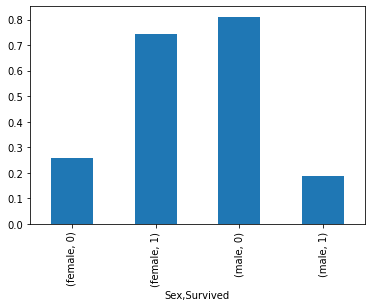

In [80]:
(titanic_df["Survived"].groupby(titanic_df.Sex).value_counts(normalize=True)
    .sort_index().plot(kind="bar"))

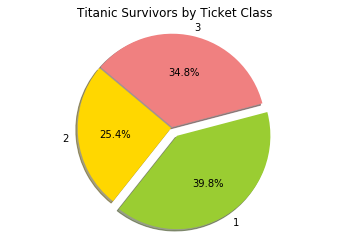

In [81]:
titanic_surv = titanic_df[titanic_df['Survived']==1]
# Data to plot
labels = '2', '1', '3'
total = titanic_surv['Pclass'].count()
surv_class = titanic_surv.groupby('Pclass')['Pclass'].count()
sizes = [surv_class[2], surv_class[1], surv_class[3]]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.01, 0.1, 0.01)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Titanic Survivors by Ticket Class')
plt.axis('equal')
plt.show()

In [82]:
titanic_df.groupby(['Sex','Pclass']).median()[['Age','Fare']]

Age      Fare
Sex    Pclass                
female 1       35.0  82.66455
       2       28.0  22.00000
       3       21.5  12.47500
male   1       40.0  41.26250
       2       30.0  13.00000
       3       25.0   7.92500

# Machine Learning

##  K-Nearest Neighbors

In [83]:
X = tit_train[["Pclass","Sex","Age"]]

In [84]:
age_med = X.Age.median()
X.Age = X.Age.fillna(age_med)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [85]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
Pclass    891 non-null int64
Sex       891 non-null object
Age       891 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 21.0+ KB


### Label Encoding of Sex

In [86]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [87]:
Sex_cat = X[["Sex"]]
Sex_label = encoder.fit_transform(Sex_cat)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [88]:
encoder.classes_

array(['female', 'male'], dtype=object)

In [89]:
Sex_label[0:6]

array([1, 0, 0, 0, 1, 1])

In [90]:
Sex_cat.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [91]:
X.Sex = Sex_label

In [92]:
X.head()

,Pclass,Sex,Age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0


### Normalize Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002906B2880F0>,
      dtype=object)

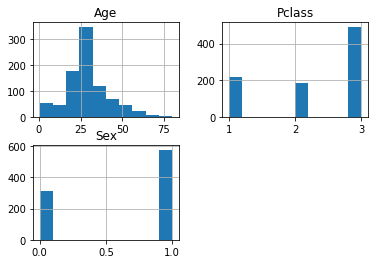

In [93]:
X.hist()

In [94]:
from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit(X).transform(X.astype(float))

In [95]:
X_normDF = pd.DataFrame(X_norm, columns=X.columns, index=X.index)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002906B288128>,
      dtype=object)

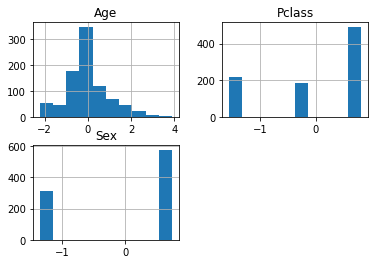

In [96]:
X_normDF.hist()

In [97]:
from sklearn.neighbors import KNeighborsClassifier
k=4
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_norm,tit_train.Survived)

In [98]:
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [99]:
yhat = neigh.predict(X_norm)
yhat[0:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [100]:
tit_train.Survived.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Accuracy evaluation
In multilabel classification, __accuracy classification score__ is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [101]:
from sklearn import metrics
print("Train set accuracy: ",metrics.accuracy_score(tit_train.Survived,yhat))

Train set accuracy:  0.8417508417508418


In [102]:
y_hat=pd.DataFrame(yhat)

## Testing Set

In [103]:
tit_test = pd.read_csv('test.csv')

In [104]:
tit_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### KNN Neighbors

#### Fill missing data

In [105]:
# tit_test.info()
med_age = tit_test.Age.median()
tit_test.Age = tit_test.Age.fillna(med_age)
med_fare = tit_test.Fare.median()
tit_test.Fare = tit_test.Fare.fillna(med_fare)

In [106]:
X_test = tit_test[["Pclass","Sex","Age"]]

#### Label Encode "Sex"

In [107]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Sex_cat = X_test[['Sex']]
Sex_cat_en = encoder.fit_transform(Sex_cat)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [108]:
X_test = tit_test[["Pclass","Sex","Age"]]

In [109]:
encoder.classes_

array(['female', 'male'], dtype=object)

In [110]:
X_test.Sex = Sex_cat_en

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [111]:
X_test.head()

,Pclass,Sex,Age
0,3,1,34.5
1,3,0,47.0
2,2,1,62.0
3,3,1,27.0
4,3,0,22.0


### Normalize data

In [112]:
from sklearn.preprocessing import StandardScaler
encoder = StandardScaler()
X_test_norm = StandardScaler().fit(X_test).transform(X_test.astype(float))

### Predict Survivors using KNN

In [113]:
y_test_hat = neigh.predict(X_test_norm)

In [114]:
tit_test["Survivor"]=pd.DataFrame(y_test_hat)

In [115]:
tit_test[tit_test.Survivor==1]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survivor
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.2875,NaN,S,1
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.00,1,0,21228,82.2667,B45,S,1
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.00,1,0,W.E.P. 5734,61.1750,E31,S,1
15,907,2,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",female,24.00,1,0,SC/PARIS 2167,27.7208,NaN,C,1
18,910,3,"Ilmakangas, Miss. Ida Livija",female,27.00,1,0,STON/O2. 3101270,7.9250,NaN,S,1
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,27.00,0,0,PC 17598,31.6833,NaN,S,1
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.00,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,1
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.00,0,1,113509,61.9792,B36,C,1
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,27.00,1,2,W./C. 6607,23.4500,NaN,S,1
36,928,3,"Roth, Miss. Sarah A",female,27.00,0,0,342712,8.0500,NaN,S,1


In [116]:
sur_rat = (float(tit_test.Survivor.sum())/float(len(tit_test)))*100
print("From {} passengers in Test set, {} survived" .format(len(tit_test),tit_test.Survivor.sum()))
print("Survivor percentage %0.2f percent" %sur_rat)

From 418 passengers in Test set, 140 survived
Survivor percentage 33.49 percent


In [117]:
tit_test[["PassengerId","Survivor"]].to_csv('Test_Submission_KNN.csv',sep=',')